# What Universities students prefer?

In this notebook, we will discuss the factors that affect students' choice of University. First will find out if **the number of admissions a University receives impacts the number of enrollments**. For example, does a high number of admissions mean more students will choose the specific University? Another aspect we'll study is if **students prefer public or private Universities**. The final step is to examine if **students are interested in continuing their academic careers by choosing a University that offers higher degrees**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import os
import warnings
warnings.filterwarnings('ignore')

## Load and explore data

The first step toward answering the questions we asked before is to load our data. Our dataset is cleaned and ready for analysis. For more information about the preprocessing of the data, take a look at the **clean_data script**.

In [2]:
os.chdir('../../Data/Cleaned_data')
df = pd.read_csv('cleaned_data.csv')
df.head()

,name,year,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_scholarship,offers_doctors_degree_professional_practice,applicants_total,admissions_total,enrolled_total,...,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,322.0,309.0,202.0,120.0,58.0,61.0,55.0,NaN,NaN,67.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0


## Basic overview

Below we plot the 20 highest Universities in terms of the number of applications they received. Next, we visualize how the number of applications, admissions, and enrollments distributes between Universities. As we can see, **most Universities received at most 5000 applications** and **accepted not more than 2000 students**. That means that **the number of applications where roughly double the number of admissions**. We also notice that for most Universities, **the number of students that enrolled was not more than 800**. 

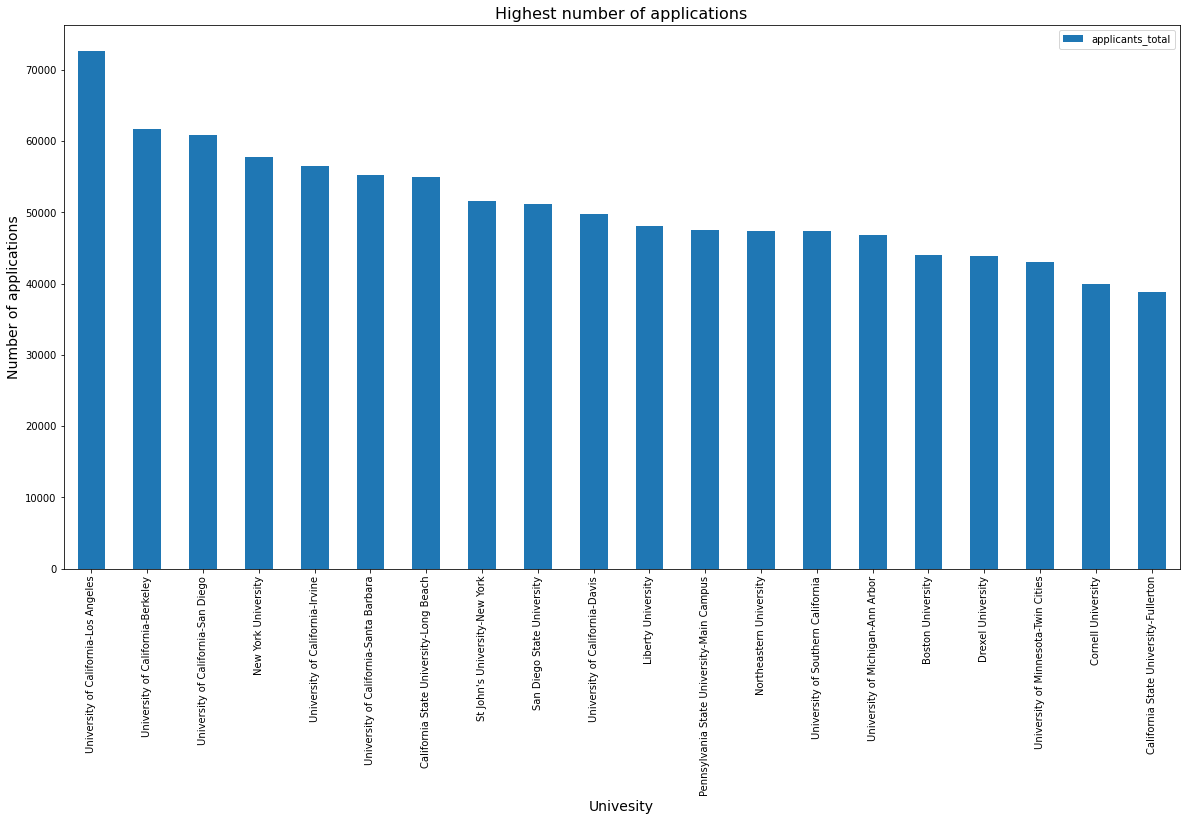

In [3]:
df[['name', 'applicants_total']].sort_values('applicants_total', ascending = False).head(20).plot.bar(x = 'name', 
                                                                                                      y = 'applicants_total', 
                                                                                                     figsize = (20,10))
plt.title('Highest number of applications', fontsize = 16)
plt.xlabel('Univesity', fontsize = 14)
plt.ylabel('Number of applications', fontsize = 14)
plt.show()

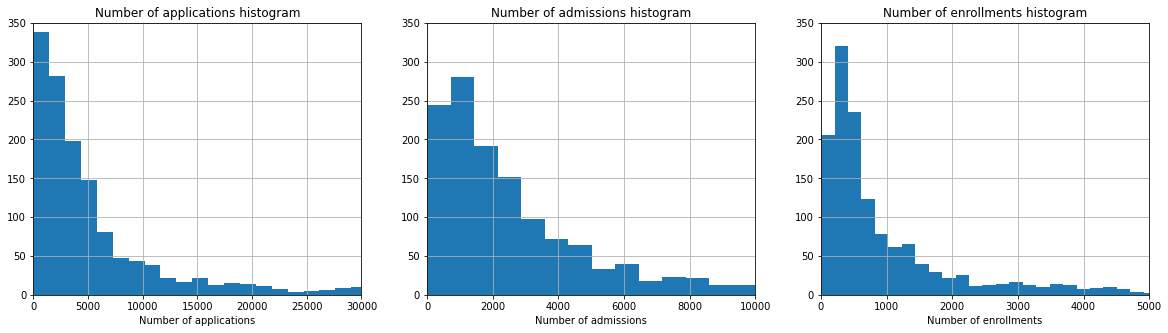

In [4]:
#Do the universities with the largest number of applications are the ones that students prefer the most?
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plt.hist(df['applicants_total'], bins = 50)
plt.title('Number of applications histogram')
plt.xlabel('Number of applications')
plt.axis([0, 30000, 0, 350])
plt.grid(True)

plt.subplot(1,3,2)
plt.hist(df['admissions_total'], bins = 50)
plt.title('Number of admissions histogram')
plt.xlabel('Number of admissions')
plt.axis([0, 10000, 0, 350])
plt.grid(True)

plt.subplot(1,3,3)
plt.hist(df['enrolled_total'], bins = 50)
plt.title('Number of enrollments histogram')
plt.xlabel('Number of enrollments')
plt.axis([0, 5000, 0, 350])
plt.grid(True)

#Most universities got 5000 application or less. Some got up to 30000 applications.
#Most univesities admited 2000 applicants or less. Some accepted more than 10000.
#In most universities enrolled 800 student's at most.

#Do higher admissions mean students prefer those universities more??

## Compare applications to admissions and enrollments. 

If we compare the number of applications and admissions a University has, we can see a trend that as the number of applications increases, so admissions do. The same is true if we compare the number of admissions to the number of enrollments.

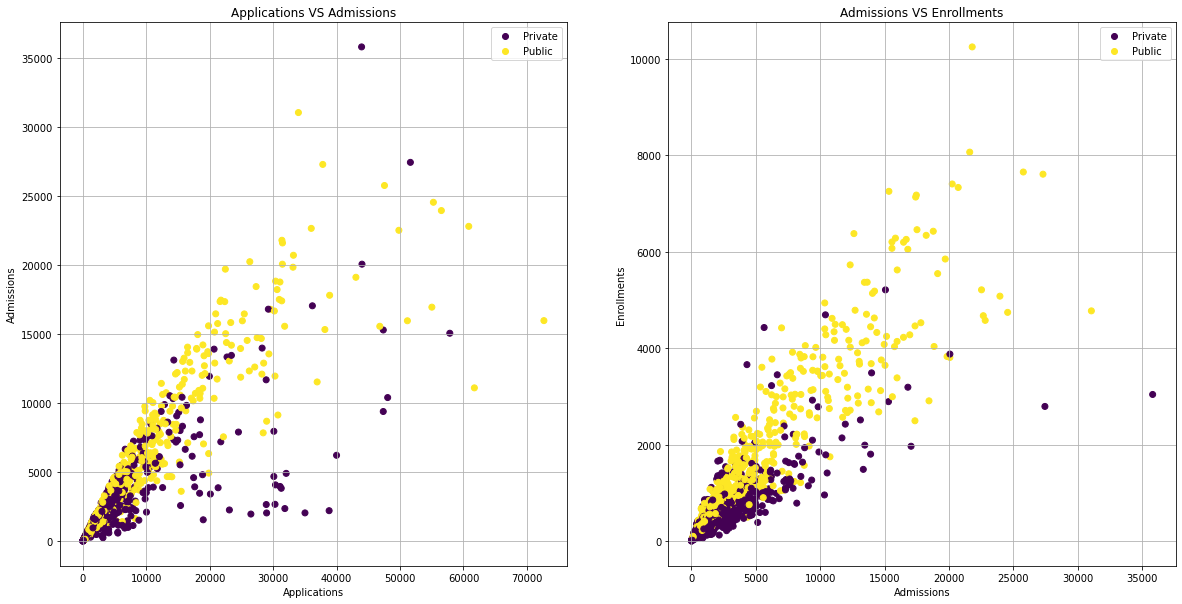

In [5]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
sc = plt.scatter(x = df['applicants_total'], y = df['admissions_total'],  
            c = df['control_of_institution'].astype('category').cat.codes)
plt.title('Applications VS Admissions')
plt.ylabel('Admissions')
plt.xlabel('Applications')
plt.grid(True)
plt.legend(handles = sc.legend_elements()[0], labels = ['Private', 'Public'])

plt.subplot(1,2,2)
sc = plt.scatter(x = df['admissions_total'], y = df['enrolled_total'],  
            c = df['control_of_institution'].astype('category').cat.codes)
plt.title('Admissions VS Enrollments')
plt.ylabel('Enrollments')
plt.xlabel('Admissions')
plt.grid(True)
plt.legend(handles = sc.legend_elements()[0], labels = ['Private', 'Public'])
plt.show()

#For the most part applications with number of applications have high number of admissions.
#The more admissions we have the more enrollments.

## Let's talk about percentages

We don't know for sure if the high number of enrollments and admissions comes from Universities with an also increased number of admissions and applications respectively. With this in mind, we calculate first the percentage of acceptance and enrollment for each University. If we plot the admissions to the enrollment rate, we find out that the fewer the admissions, the greater the enrollment rate. That means that if a student has been accepted to a University with a low number of admissions he'll probably enroll in that University.

In [6]:
df['accept_rate'] = df['admissions_total'] / df['applicants_total'] * 100

In [7]:
df['enroll_rate'] = df['enrolled_total'] / df['admissions_total'] * 100

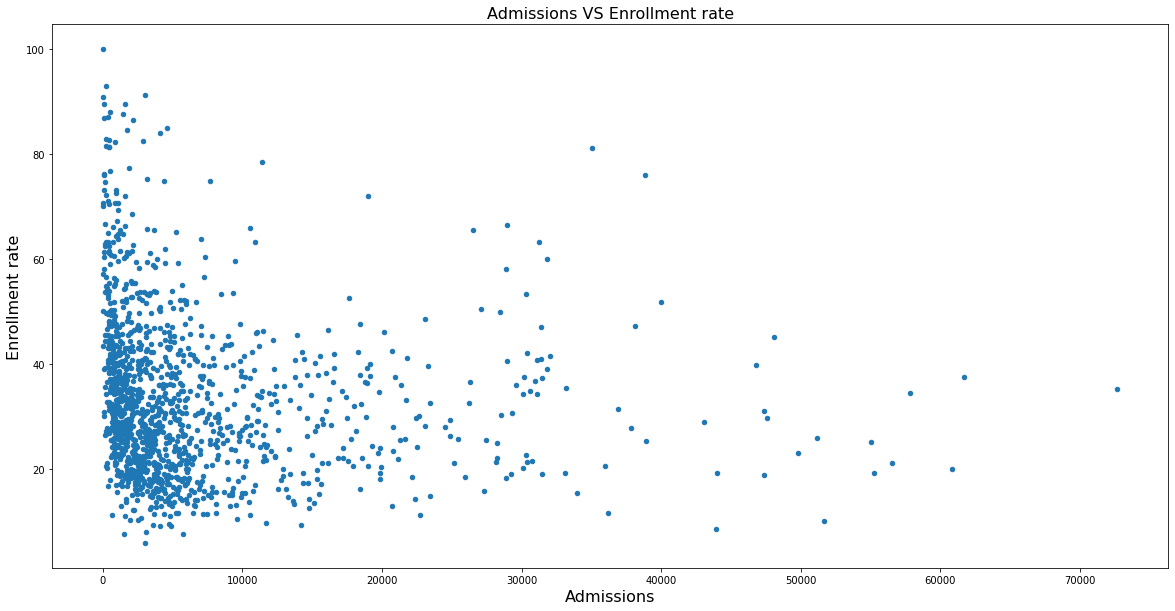

In [8]:
df.plot.scatter(x = 'applicants_total', y = 'enroll_rate', figsize = (20,10))
plt.title('Admissions VS Enrollment rate', fontsize = 16)
plt.xlabel('Admissions', fontsize = 16)
plt.ylabel('Enrollment rate', fontsize = 16)
plt.show()

#We see that universities with lower number of applications get more enrollments. So we can say that a high number of applications
#means high number of enrollments.

## Another conformation

In the plot above, we found that fewer applications mean more enrollments. Now we compare the enrollment rate against the acceptance rate. Again we see the Universities with fewer acceptances have a high number of enrollments.

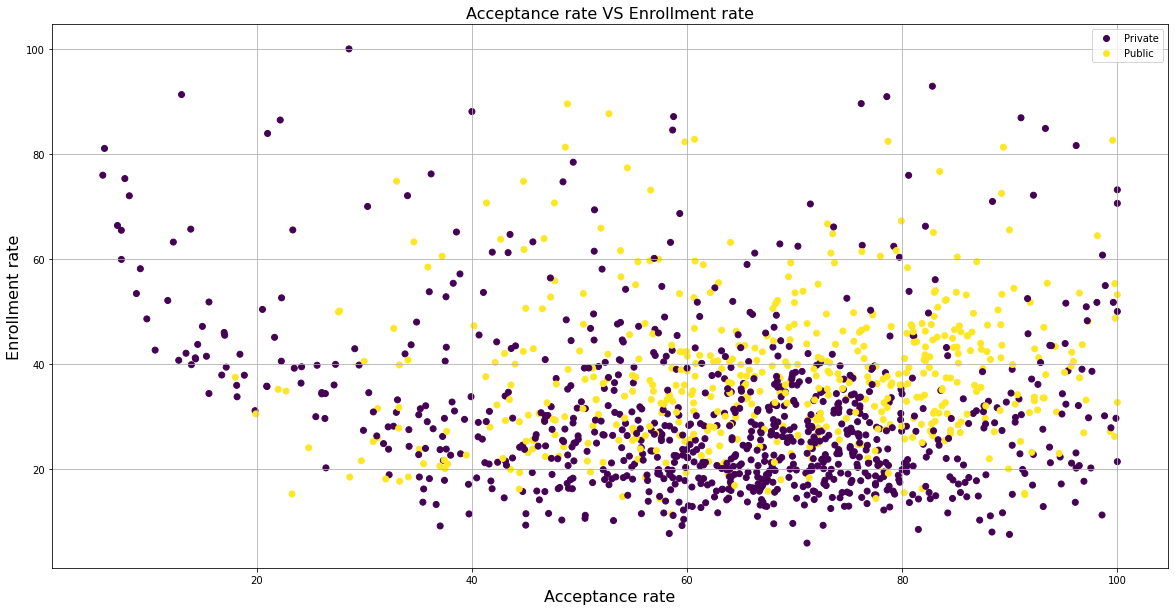

In [9]:
plt.figure(figsize = (20, 10))
sc = plt.scatter(x = df['accept_rate'], y = df['enroll_rate'], c = df['control_of_institution'].astype('category').cat.codes)
plt.title('Acceptance rate VS Enrollment rate', fontsize = 16)
plt.xlabel('Acceptance rate', fontsize = 16)
plt.ylabel('Enrollment rate', fontsize = 16)
plt.grid(True)
plt.legend(handles = sc.legend_elements()[0], labels = ['Private', 'Public'])
plt.show()

#As we can see for the universities with low number of admissions we have high number of enrollments. We can also see that the higher number
#of admissions don't mean high number of enrollments.

## High VS Low acceptance rates

The two plots below show us that if the acceptance rate is high doesn't mean the enrollment is also high. On the other hand, we see that the Universities with low acceptance rates have at least double enrollment rates. That concludes that students prefer Universities that are more difficult to be accepted. 

In [10]:
high_accept = df[df['accept_rate'].notnull()].sort_values(by = 'accept_rate', ascending = False).head(20)
low_accept = df[df['accept_rate'].notnull()].sort_values(by = 'accept_rate', ascending = False).tail(20)

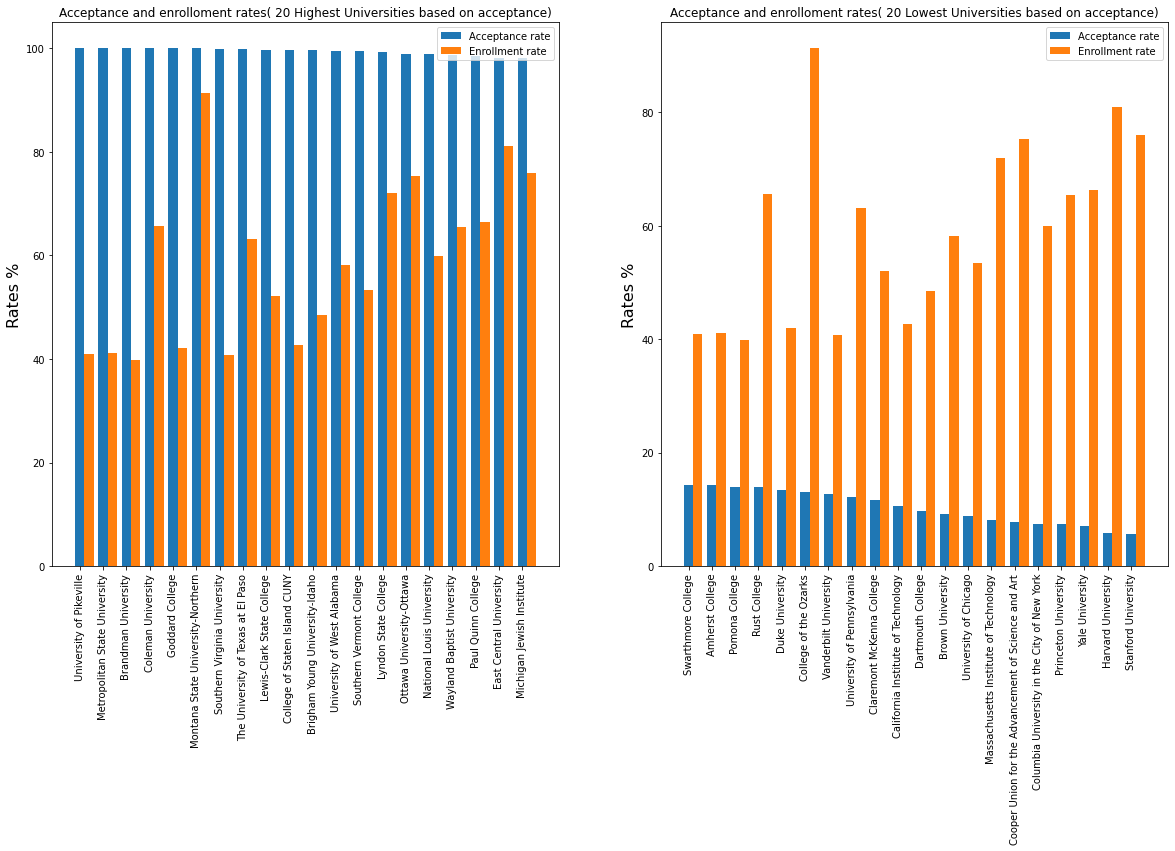

In [11]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1)
plt.bar(np.arange(len(high_accept)), high_accept['accept_rate'], 0.4, label = 'Acceptance rate')
plt.bar(np.arange(len(high_accept)) + 0.4, low_accept['enroll_rate'], 0.4, label = 'Enrollment rate')
plt.title('Acceptance and enrolloment rates( 20 Highest Universities based on acceptance)')
plt.ylabel('Rates %', fontsize = 16)
plt.xticks(np.arange(len(high_accept)),high_accept['name'].values, rotation = 90)
plt.legend(loc= 'best');

plt.subplot(1,2,2)
plt.bar(np.arange(len(low_accept)), low_accept['accept_rate'], 0.4, label = 'Acceptance rate')
plt.bar(np.arange(len(low_accept)) + 0.4, low_accept['enroll_rate'], 0.4, label = 'Enrollment rate')
plt.title('Acceptance and enrolloment rates( 20 Lowest Universities based on acceptance)')
plt.ylabel('Rates %', fontsize = 16)
plt.xticks(np.arange(len(low_accept)),low_accept['name'].values, rotation = 90)
plt.legend(loc= 'best');

plt.show()

#We also find out here that high number of acceptance dosen't mean high number of enrollments. As we can see for the Universities 
#with low acceptance rates the number of enrollments is higher. This means that if a Universitie with low acceptance rate accepts
#a student then most likely the student will enroll.

In [12]:
private = df[df['control_of_institution'] == 'Private not-for-profit']
private = private[private['applicants_total'].notnull()]
private.head()

,name,year,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_scholarship,offers_doctors_degree_professional_practice,applicants_total,admissions_total,enrolled_total,...,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total,accept_rate,enroll_rate
9,Birmingham Southern College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,1931.0,1240.0,356.0,...,1167.0,21.0,46.0,46.0,NaN,53.0,60.0,62.0,64.215432,28.709677
12,Huntingdon College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,1470.0,923.0,261.0,...,902.0,208.0,50.0,50.0,NaN,30.0,40.0,43.0,62.789116,28.277356
14,Judson College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,268.0,198.0,68.0,...,262.0,85.0,95.0,95.0,NaN,38.0,41.0,41.0,73.880597,34.343434
17,University of Mobile,2013,Master's degree,Yes,Yes,Implied no,Implied no,866.0,617.0,259.0,...,1257.0,224.0,68.0,67.0,81.0,33.0,47.0,49.0,71.247113,41.977310
20,Oakwood University,2013,Master's degree,Yes,Yes,Implied no,Implied no,2728.0,937.0,409.0,...,1771.0,90.0,58.0,57.0,62.0,19.0,31.0,37.0,34.347507,43.649947


In [13]:
public = df[df['control_of_institution'] == 'Public']
public = public[public['applicants_total'].notnull()]
public.head()

,name,year,highest_degree_offered,offers_bachelors_degree,offers_masters_degree,offers_doctors_degree_research_scholarship,offers_doctors_degree_professional_practice,applicants_total,admissions_total,enrolled_total,...,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total,accept_rate,enroll_rate
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0,89.889287,19.996377
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0,86.728775,35.934333
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0,80.623174,39.311594
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0,51.254270,28.166064
5,The University of Alabama,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,30975.0,17515.0,6454.0,...,26548.0,2892.0,55.0,54.0,58.0,43.0,62.0,67.0,56.545601,36.848416


## Public or Private?

One of the questions we asked, in the beginning, was if students prefer public over private Universities. If we plot the data, we see that we have more public Universities than private and that also public receives more applications than private. We also see that students enroll more often in public universities.

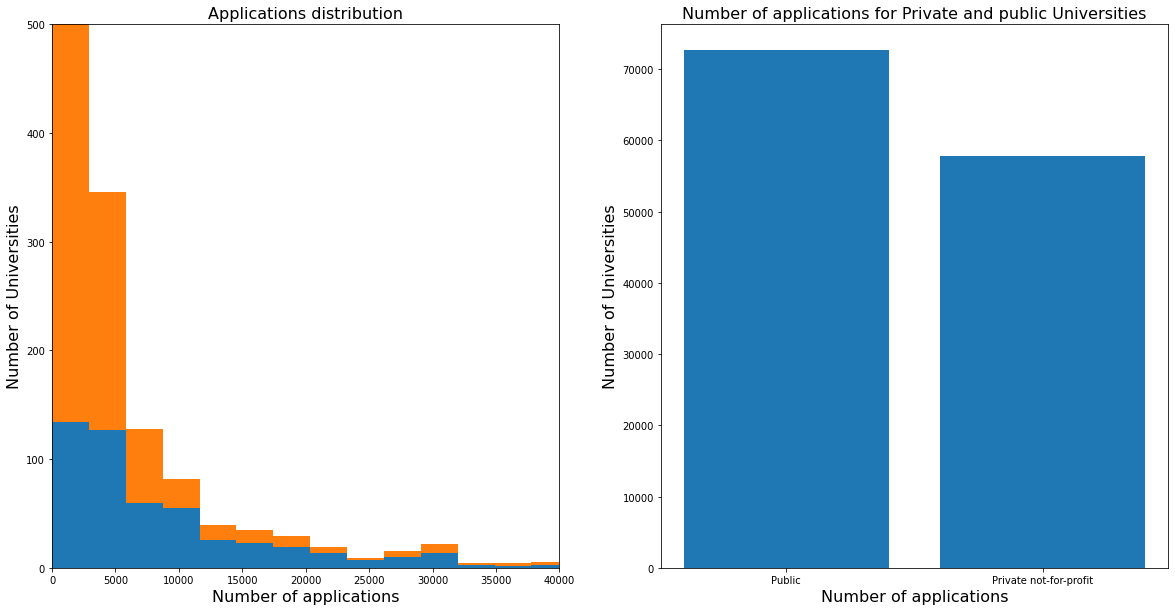

In [14]:
plt.figure(figsize = (20, 10))

plt.subplot(1,2,1)
plt.hist([public['applicants_total'], private['applicants_total']], stacked = True, bins = 25)
plt.axis([0, 40000, 0, 500])
plt.title('Applications distribution', fontsize = 16)
plt.xlabel('Number of applications', fontsize = 16)
plt.ylabel('Number of Universities', fontsize = 16)

plt.subplot(1,2,2)
plt.bar(x = df['control_of_institution'], height = df['applicants_total'])
plt.title('Number of applications for Private and public Universities', fontsize = 16)
plt.xlabel('Number of applications', fontsize = 16)
plt.ylabel('Number of Universities', fontsize = 16)

plt.show()

#We see that public Universities have more applications from private Universities. We should explore if students 
#prefer public over private Universities.

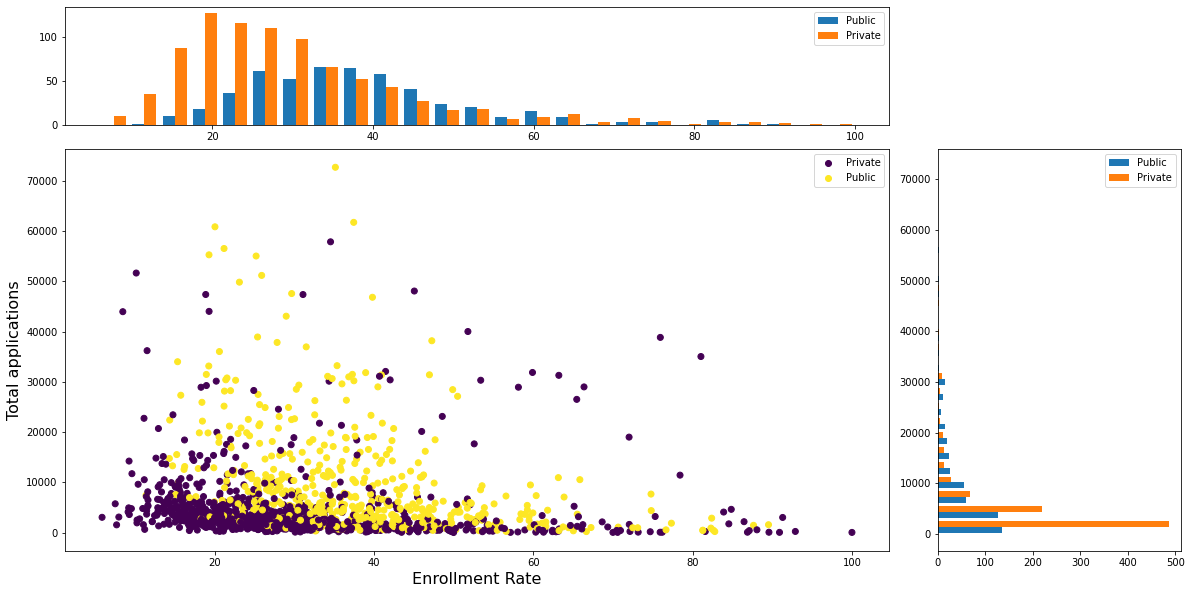

In [15]:
fig = plt.figure(figsize = (20, 10))

gs = GridSpec(4, 4)
ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(df['enroll_rate'], df['applicants_total'], c = df['control_of_institution'].astype('category').cat.codes)
ax_scatter.legend(handles = sc.legend_elements()[0], labels = ['Private', 'Public'])
ax_scatter.set_xlabel('Enrollment Rate', fontsize = 16)
ax_scatter.set_ylabel('Total applications', fontsize = 16)
ax_hist_x.hist([public['enroll_rate'], private['enroll_rate']], bins = 25)
ax_hist_x.legend(['Public', 'Private'])
ax_hist_y.hist([public['applicants_total'], private['applicants_total']], bins = 25, orientation = 'horizontal')
ax_hist_y.legend(['Public', 'Private'])

plt.show()

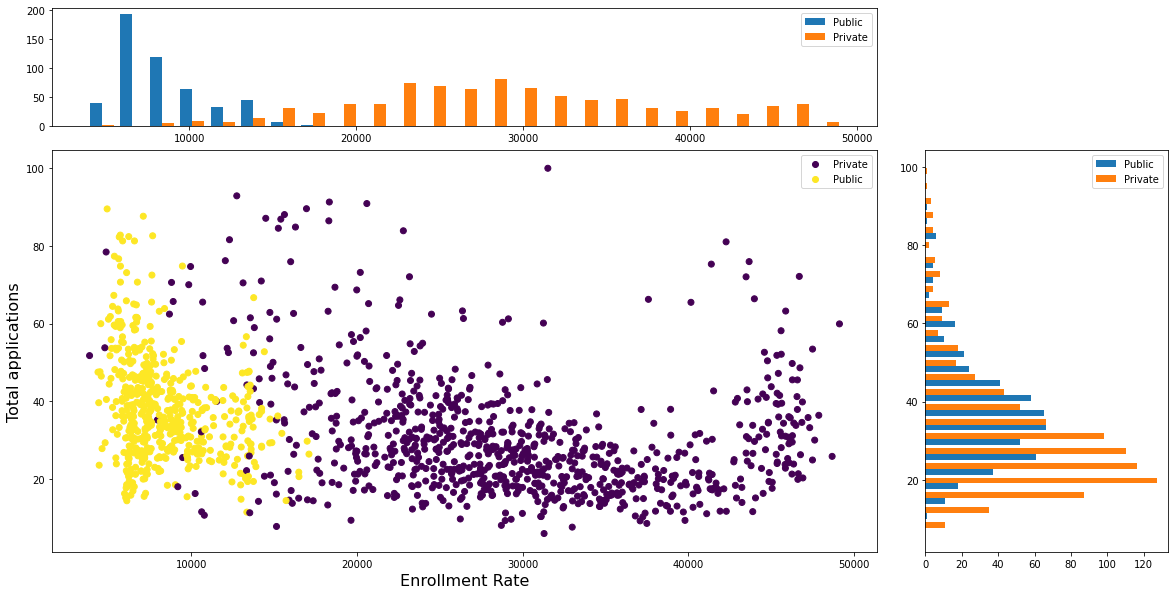

In [16]:
fig = plt.figure(figsize = (20, 10))

gs = GridSpec(4, 4)
ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs[0,0:3])
ax_hist_y = fig.add_subplot(gs[1:4, 3])

ax_scatter.scatter(df['tuition_and_fees_2013_14'], df['enroll_rate'], c = df['control_of_institution'].astype('category').cat.codes)
ax_scatter.legend(handles = sc.legend_elements()[0], labels = ['Private', 'Public'])
ax_scatter.set_xlabel('Enrollment Rate', fontsize = 16)
ax_scatter.set_ylabel('Total applications', fontsize = 16)
ax_hist_x.hist([public['tuition_and_fees_2013_14'], private['tuition_and_fees_2013_14']], bins = 25)
ax_hist_x.legend(['Public', 'Private'])
ax_hist_y.hist([public['enroll_rate'], private['enroll_rate']], bins = 25, orientation = 'horizontal')
ax_hist_y.legend(['Public', 'Private'])

plt.show()

## Countinue studying?

As we can see below, most Universities offer up to Master's Degree. When we plot the highest degree offered by the University and the enrollment rate we see that most students choose Universities that offer Bachelor's or Master's degree most of the time. As a result we can say that students don't care that much about studing further.

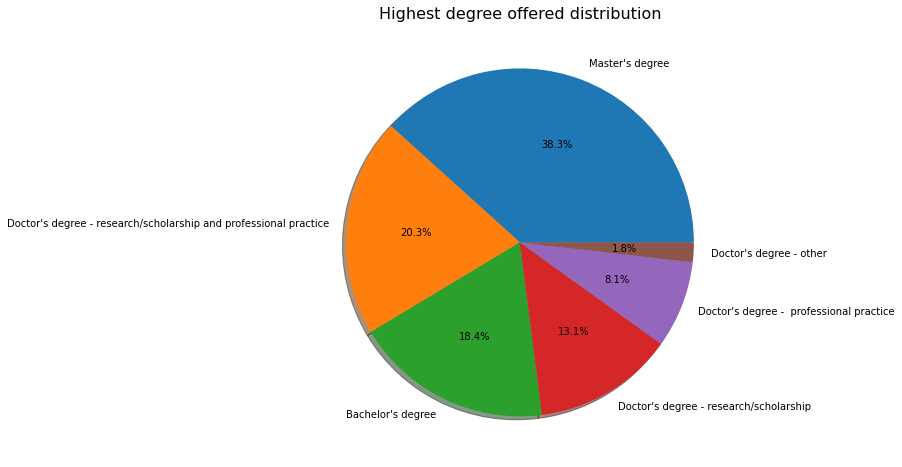

In [29]:
plt.title('Highest degree offered distribution', fontsize = 16)
df['highest_degree_offered'].value_counts().plot.pie(figsize = (10,8), shadow = True,  autopct='%1.1f%%', textprops = {'fontsize' : 10})
plt.ylabel('')
plt.show()

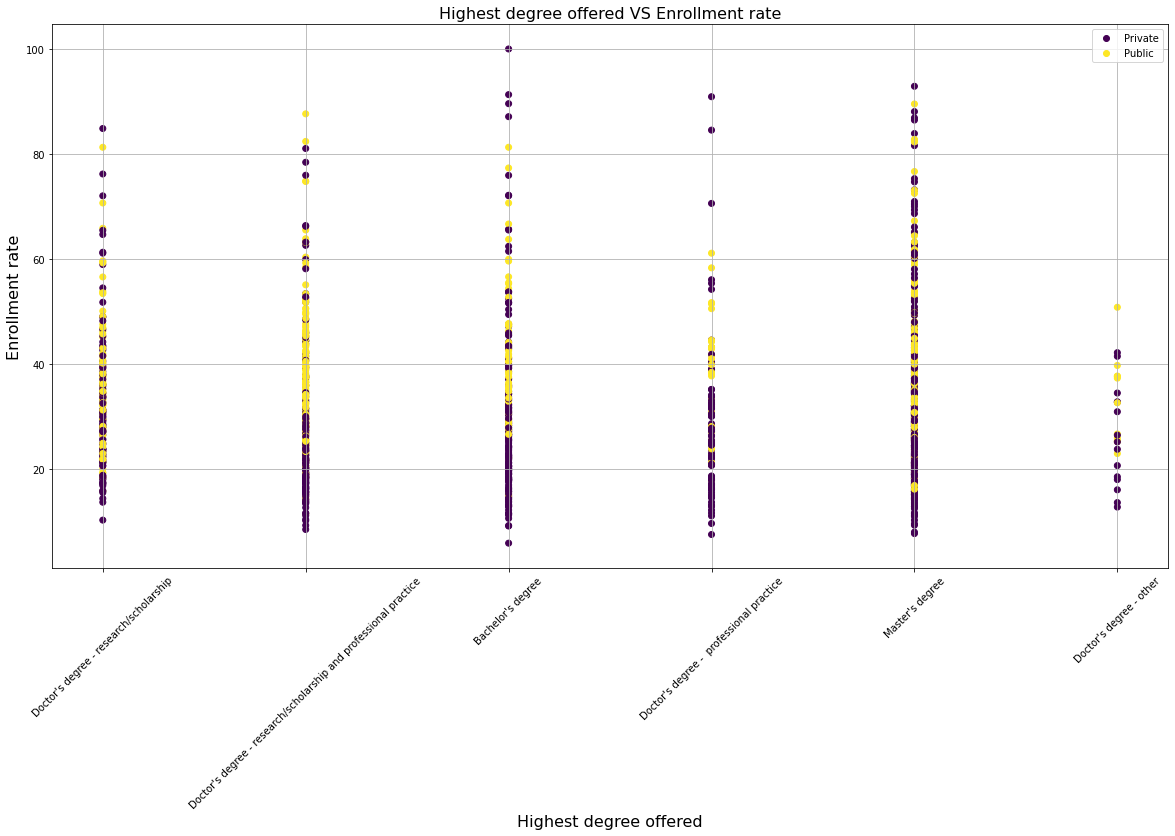

In [31]:
plt.figure(figsize = (20, 10))
sc = plt.scatter(x = df['highest_degree_offered'], y = df['enroll_rate'], c = df['control_of_institution'].astype('category').cat.codes)
plt.title('Highest degree offered VS Enrollment rate', fontsize = 16)
plt.xlabel('Highest degree offered', fontsize = 16)
plt.xticks(rotation = 45)
plt.ylabel('Enrollment rate', fontsize = 16)
plt.grid(True)
plt.legend(handles = sc.legend_elements()[0], labels = ['Private', 'Public'])
plt.show()